The analysis is done on Jupyter-lab environment with python machine learning and numerical packages. Instead of using convenient softwares, python is used to make the report transparent for reader to understand algorithm. The procedure of analysis is as follows:

# Importing Packages

Firstly, the packages are imported. Statsmodels.api and Scientific 
python is imported for regression analysis. Matplotlib library is used to visualize the results. Panel Data (Pandas) is used to read xlsx file and to split dataset.

In [1]:
import numpy as np
import pandas as pd
import math
import random
import scipy.stats as ss
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Importing Data

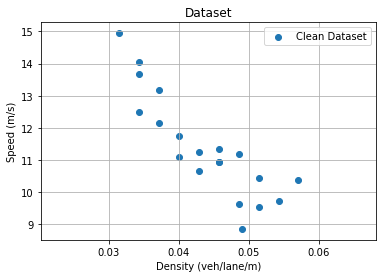

In [17]:
#importing data from excel file into pandas dataframe
data = pd.read_excel("Datasheet_dr-corrected.xlsx")
# del data["Unnamed: 0"]

#slicing data 8:2 for training dataset
x = np.array(data['Density'].iloc[:20])
y = np.array(data['Speed'].iloc[:20])

#plotting the training dataset
plt.title("Dataset")
plt.scatter(x,y,label="Clean Dataset")
plt.legend(),plt.grid()
plt.xlabel("Density (veh/lane/m)")
plt.ylabel('Speed (m/s)')
plt.savefig("Dataset")

In [3]:
#printing the training dataset
data.iloc[:20]


,Density,Speed
0,0.049000,8.845000
1,0.057000,10.370000
2,0.031429,14.959708
3,0.034286,14.051131
4,0.034286,12.486536
5,0.034286,13.664238
6,0.037143,12.144055
7,0.037143,13.174407
8,0.040000,11.757503
9,0.040000,11.085490


# 

# Regression Analysis

Now, the one linear model and three non-linear model will be trained with training dataset. The OLS and Curve_fit functions are used to run analysis. Scikit-learn built-in package is used to find R2 value for non-linear models.

# Linear Regression

In [4]:
#add constant for intercept
X = sm.add_constant(x)

#Run OLS on given variables
model = sm.OLS(y,X)

#print summary
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     54.77
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           7.29e-07
Time:                        01:21:51   Log-Likelihood:                -23.338
No. Observations:                  20   AIC:                             50.68
Df Residuals:                      18   BIC:                             52.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6556      1.129     17.408      0.000      17.283      22.028
x1          -189.1770     25.562     -7.401      0.000    -242.881    -135.473
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.434
Skew:                           0.038   Prob(JB):                        0.805
Kurtosis:                       2.282   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Curve fitting- Function:1

In [5]:
#define first exponential function
def expf1(x,a,b):
    return a*x**b

#Run curve fitting from scipy
popt,pocv = curve_fit(expf1,x,y)

#finding R2 matrix
y_pred = expf1(x,*popt)
r2 = r2_score(y,y_pred)
print("The Coefficient of determination is :",r2)
print("The Coefficients are :",popt)


The Coefficient of determination is : 0.8152943673809129
The Coefficients are : [ 1.1068675  -0.73885123]


# Curve fitting- Function:2

In [18]:
#define second function

def expf2(x,a,b):
    return a*math.e**(x*b)
#Run curve fitting from scipy
popt,pocv = curve_fit(expf2,x,y)

#finding R2 matrix
y_pred = expf2(x,*popt)
r2 = r2_score(y,y_pred)
print("The Coefficient of determination is :",r2)
print("The Coefficients are :",popt)

The Coefficient of determination is : 0.7830082260376968
The Coefficients are : [ 24.02311143 -17.2628133 ]


# Curve fitting- Function:3

In [19]:
def expf3(x,a,b,c):
    return (a*(x**b)+c)
#Run curve fitting from scipy
popt,pocv = curve_fit(expf3,x,y)

#finding R2 matrix
y_pred = expf3(x,*popt)
r2 = r2_score(y,y_pred)
print("The Coefficient of determination is :",r2)
print("The Coefficients are :",popt)

The Coefficient of determination is : 0.849982909670189
The Coefficients are : [ 5.75599080e-05 -3.34298148e+00  8.91251502e+00]


# Visualization

The parameter from each analysis is then used to visualize each model. Data for x axis is generated for getting continuous datapoint.

# Linear Model

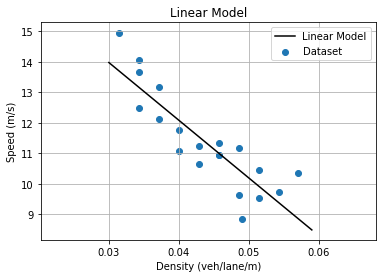

In [8]:
xgen = np.arange(0.03,0.06,0.001)
ygen = -189.1770*xgen+19.6556
plt.title("Linear Model")
plt.scatter(x,y,label="Dataset")
plt.plot(xgen,ygen,'-k',label="Linear Model")
plt.legend(),plt.grid()
plt.xlabel("Density (veh/lane/m)")
plt.ylabel('Speed (m/s)')
plt.savefig("linear")

# Non linear model - Function 1

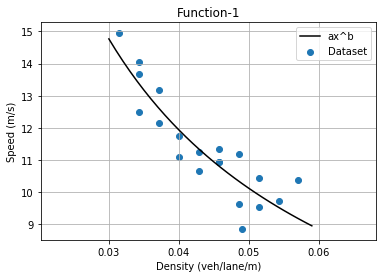

In [20]:
xgen = np.arange(0.03,0.06,0.001)
ygen = expf1(xgen,1.1068675,-0.73885123)
plt.title("Function-1")
plt.scatter(x,y,label="Dataset")
plt.plot(xgen,ygen,'k',label="ax^b")
plt.legend(),plt.grid()
plt.xlabel("Density (veh/lane/m)")
plt.ylabel('Speed (m/s)')
plt.savefig("Func1")


# Non linear model - Function 2

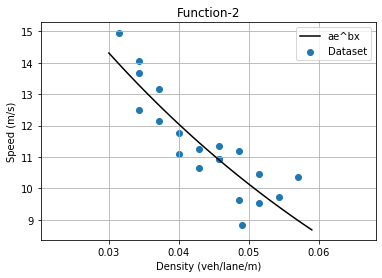

In [21]:
#generating variables
xgen = np.arange(0.03,0.06,0.001)
ygen = expf2(xgen,24.02311143 ,-17.2628133 )

#plotting data
plt.title("Function-2")
plt.scatter(x,y,label="Dataset")
plt.plot(xgen,ygen,'k',label="ae^bx")
plt.legend(),plt.grid()
plt.xlabel("Density (veh/lane/m)")
plt.ylabel('Speed (m/s)')
plt.savefig("Func2")


# Non linear model - Function 3

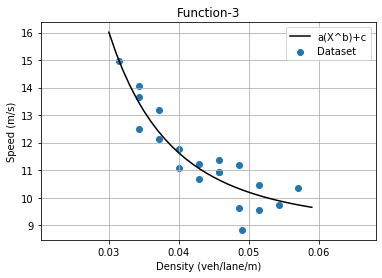

In [25]:
#generating variables
xgen = np.arange(0.03,0.06,0.001)
ygen = expf3(xgen,5.75599080e-05,-3.34298148e+00,8.91251502e+00)

#plotting data
plt.title("Function-3")
plt.scatter(x,y,label="Dataset")
plt.plot(xgen,ygen,'k',label="a(X^b)+c")
plt.legend(),plt.grid()
plt.xlabel("Density (veh/lane/m)")
plt.ylabel('Speed (m/s)')
plt.savefig("Func3")


This is the best fitting model with an R2 value of 0.85